1. The algorithm in Listing 1 exhaustively tries all possible solutions using recursion. Fill up the “?” s of the
given algorithm.

In [2]:
def is_subset_sum_recursive(arr, n, target, subset=[]):
    # Base Case: If target sum is achieved
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True

    # Base Case: If all elements are traversed but target sum is not achieved
    if n == 0 and target != 0:
        return False

    # If the last element is greater than the target, ignore it
    if arr[n - 1] > target:
        return is_subset_sum_recursive(arr, n - 1, target, subset)

    # Check if sum can be obtained by including or excluding the last element
    return is_subset_sum_recursive(arr, n - 1, target, subset) or \
           is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]])



2. Enumerate all the solutions you get by implementing the algorithm: for each set and each target. Your implementation
should print “No Subset Found with given sum” if there doesn’t exist a given subset sum. Use any
Python command to note down the time taken in execution of the algorithm for each case

In [5]:
set1= [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24]
set2= [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
set3= [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24]
set4= [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
target1= 140
target2= 165
target3= 182


In [3]:
import time

In [8]:
sets=[set1,set2,set3,set4]
Target=[target1,target2,target3]
time_for_algo_1=[]
for i in range(len(sets)):
  time_value=[]
  for j in range(len(Target)):

    arr=list(sets[i])
    start=time.time()
    n=len(sets[i])
    target=Target[j]
    status=is_subset_sum_recursive(arr, n, target, subset=[])
    end=time.time()
    print(f'for target value {Target[j]} status by set{sets[i]} is {status}')

    time_value.append(end-start)
    if status==False:
      print('Time Taken :',end-start)
      # time_value.append(end-start)
      print(f'“No Subset Found with given sum”')
    else:
      print('Time Taken :',end-start)
  time_for_algo_1.append(time_value)


Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
for target value 140 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
Time Taken : 0.015428304672241211
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
for target value 165 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
Time Taken : 0.020512104034423828
for target value 182 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is False
Time Taken : 0.021292448043823242
“No Subset Found with given sum”
Subset with the given sum exists: [21, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
for target value 140 status by set[3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23] is True
Time Taken : 0.011065244674682617
Subset with the given sum exists: [23, 21, 19, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
for target value 165 status by set[3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23] is True
Time Taken : 0.02

In [10]:
print("Time taken in execution of the algorithm for each case ",time_for_algo_1)

Time taken in execution of the algorithm for each case  [[0.015428304672241211, 0.020512104034423828, 0.021292448043823242], [0.011065244674682617, 0.02649068832397461, 0.022609233856201172], [0.006304740905761719, 0.020188093185424805, 0.023133516311645508], [0.010497570037841797, 0.021625518798828125, 0.02863335609436035]]


3. The algorithm in Listing 2 uses dynamic programming to create a table to store the answers from previous
cases. Fill up the “?” s of the given algorithm.

In [12]:
def subset_sum(numbers, target_sum):
    n = len(numbers)
    dyn_prog = [[False] * (target_sum + 1) for _ in range(n + 1)]
    numbers=list(numbers)
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dyn_prog[i][0] = True

    # Fill the dyn_prog table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            if numbers[i - 1] > j:
                dyn_prog[i][j] = dyn_prog[i - 1][j]
            else:
                dyn_prog[i][j] = dyn_prog[i - 1][j] or dyn_prog[i - 1][j - numbers[i - 1]]

    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dyn_prog[i][j] == dyn_prog[i - 1][j]:
            i -= 1
        else:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
            i -= 1

    return dyn_prog[n][target_sum], subset[::-1]


4. Solve for each set and each target using the algorithm in Listing 2. Your implementation should print “No
Subset Found with given sum” if there doesn’t exist a given subset sum. Use any Python command to note
down the time taken in execution of the algorithm for each case.

In [13]:
subset_sum(set1,target1)

(True, [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22])

In [14]:
time_values=[]
time_algo_2=[]
for i in range(len(sets)):
  t2=[]
  for j in range(len(Target)):
    time_status=[]
    start=time.time()
    status,ordered_set=subset_sum(sets[i],Target[j])
    end=time.time()
    print(f'For target value {Target[j]} status by set{sets[i]} is {status}')
    time_diff=end-start
    t2.append(time_diff)
    if status==True:
      time_status.extend([time_diff,status])
      time_values.append(time_status)
      print(f'The orderd set we get {ordered_set}')
      print('Time taken: ',end-start)
      print()
    else:
      time_status.extend([time_diff,status])
      time_values.append(time_status)
      print(f'“No Subset Found with given sum”')
      print('Time taken  is ',end-start)
      print()
  time_algo_2.append(t2)

For target value 140 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
The orderd set we get [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Time taken:  0.0008933544158935547

For target value 165 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is True
The orderd set we get [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Time taken:  0.001344442367553711

For target value 182 status by set[2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24] is False
“No Subset Found with given sum”
Time taken  is  0.0009036064147949219

For target value 140 status by set[3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23] is True
The orderd set we get [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 21]
Time taken:  0.0006458759307861328

For target value 165 status by set[3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23] is True
The orderd set we get [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 19, 21, 23]
Time taken:  0.0008242130279541016

For target value 18

In [15]:
print("time taken in execution of the algorithm for each case",time_algo_2)

time taken in execution of the algorithm for each case [[0.0008933544158935547, 0.001344442367553711, 0.0009036064147949219], [0.0006458759307861328, 0.0008242130279541016, 0.0008089542388916016], [0.0006766319274902344, 0.0006358623504638672, 0.0007352828979492188], [0.0005502700805664062, 0.0006597042083740234, 0.0007054805755615234]]


In [ ]:
print(time_values[0][1])

True


In [16]:
from prettytable import PrettyTable

In [18]:
time_list=[]
for i in range(len(time_values)):
  time_list.append(time_values[i][0])

In [19]:
time_list

[0.0008933544158935547,
 0.001344442367553711,
 0.0009036064147949219,
 0.0006458759307861328,
 0.0008242130279541016,
 0.0008089542388916016,
 0.0006766319274902344,
 0.0006358623504638672,
 0.0007352828979492188,
 0.0005502700805664062,
 0.0006597042083740234,
 0.0007054805755615234]

5. Plot a graph of input size vs worst-case time taken for both the algorithms.

In [21]:
list_num=[11,2,3,44,5,6,7]

In [22]:
def digit_sum(list_num):
  digit_list=[]
  for num in list_num:
    j=0

    for i in range(len(str(num))):
      j+=1
    digit_list.append(j)
  return digit_list


In [23]:
set1= [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24]
set2= [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
set3= [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24]
set4= [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
Set=[set1,set2,set3,set4]
target1= [140]
target2= [165]
target3= [182]
target=[target1,target2,target3]

In [24]:
set_sum1=sum(digit_sum(set1))
set_sum2=sum(digit_sum(set2))
set_sum3=sum(digit_sum(set3))
set_sum4=sum(digit_sum(set4))
target_digit=[]
for num in target:
  target_digit.append(sum(digit_sum(num)))
len_set=[]
for i in Set:
  len_set.append(sum(digit_sum([len(i)])))
print(len_set)
print(target_digit)

[2, 2, 2, 2]
[3, 3, 3]


In [26]:
print("Time for algo 1",time_for_algo_1)

Time for algo 1 [[0.015428304672241211, 0.020512104034423828, 0.021292448043823242], [0.011065244674682617, 0.02649068832397461, 0.022609233856201172], [0.006304740905761719, 0.020188093185424805, 0.023133516311645508], [0.010497570037841797, 0.021625518798828125, 0.02863335609436035]]


In [27]:
def max_time_function(algo):
  max_time=[]
  index_list=[]
  for time_list in algo:
    time=0
    ind=[]
    for j in range(len(time_list)):

      if time_list[j]>time:
        time=time_list[j]
        ind.append(j)
        #print(ind)

    index_list.append(max(ind))
    max_time.append(time)
  return max_time,index_list

In [28]:
max_time_1,index_list_1=max_time_function(time_for_algo_1)
max_time_2,index_list_2=max_time_function(time_algo_2)

In [36]:
input_size=[]
for i in range(len(Set)):
  selected_set=Set[i]
  sum_digit_set=sum(digit_sum(selected_set))
  sum_target=target_digit[index_list_1[i]]
  sum_set=len_set[i]
  input=sum_digit_set+sum_target+sum_set
  input_size.append(input)

In [33]:
index_list_1

[2, 1, 2, 2]

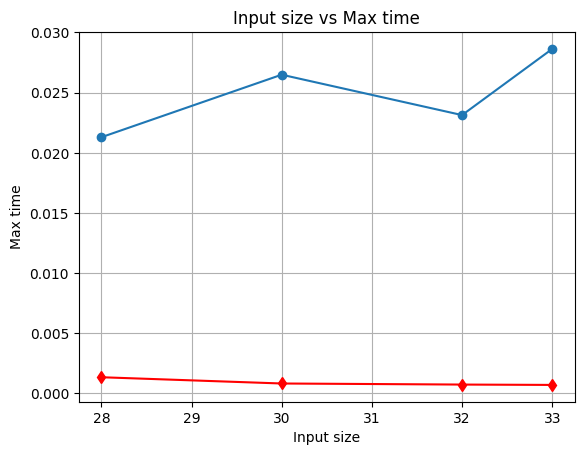

In [37]:
import matplotlib.pyplot as plt

plt.plot(input_size, max_time_1, marker='o', linestyle='-')
plt.plot(input_size,max_time_2,marker='d',linestyle='-',color='red')
plt.title('Input size vs Max time')
plt.xlabel('Input size')
plt.ylabel('Max time')
plt.grid(True)
plt.show()


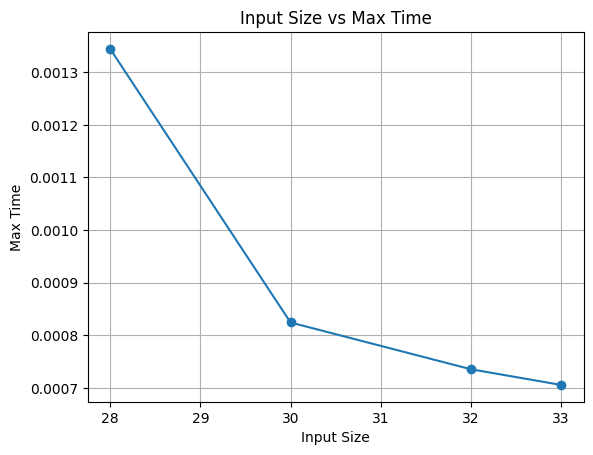

In [38]:
max_time,index_list=max_time_function(time_algo_2)
plt.plot(input_size, max_time, marker='o', linestyle='-')
plt.title('Input Size vs Max Time')
plt.xlabel('Input Size')
plt.ylabel('Max Time')
plt.grid(True)
plt.show()
